In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [19]:
train_data="/kaggle/input/fruit-and-vegetable-image-recognition/train"
test_data="/kaggle/input/fruit-and-vegetable-image-recognition/test"
val_data="/kaggle/input/fruit-and-vegetable-image-recognition/validation"

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
img_height,img_width=256,256
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,labels='inferred',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3115 files belonging to 36 classes.


In [22]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data,
    labels='inferred',
  
  
  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 351 files belonging to 36 classes.


In [23]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


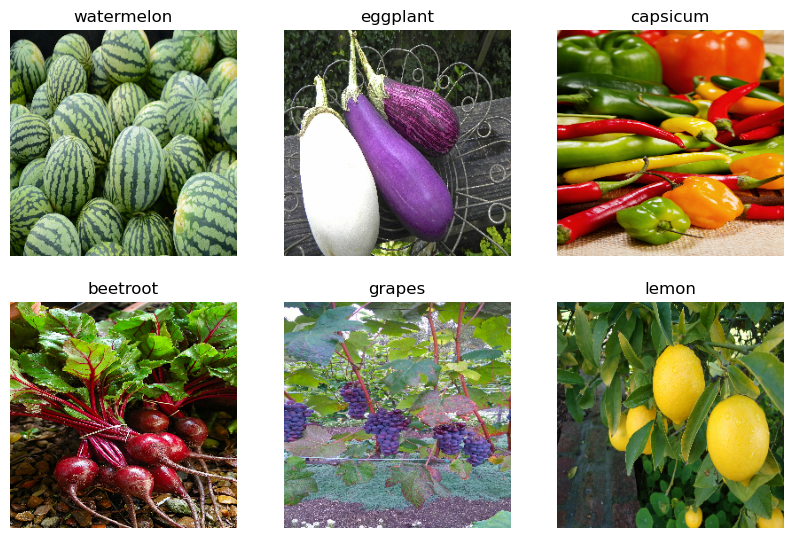

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=36,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(36, activation='softmax'))

In [26]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 36)               18468     
 pper)                                                           
                                                                 
Total params: 24,655,268
Trainable params: 1,067,556
Non-trainable params: 23,587,712
__________________________________

In [27]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:

history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7
)

Epoch 1/7
98/98 [==============================] - 70s 607ms/step - loss: 1.5015 - accuracy: 0.5952 - val_loss: 0.4158 - val_accuracy: 0.8575
Epoch 2/7
98/98 [==============================] - 67s 621ms/step - loss: 0.5457 - accuracy: 0.8350 - val_loss: 0.3493 - val_accuracy: 0.8860
Epoch 3/7
98/98 [==============================] - 64s 599ms/step - loss: 0.3198 - accuracy: 0.9005 - val_loss: 0.1962 - val_accuracy: 0.9373
Epoch 4/7
98/98 [==============================] - 65s 606ms/step - loss: 0.2078 - accuracy: 0.9422 - val_loss: 0.1636 - val_accuracy: 0.9573
Epoch 5/7
98/98 [==============================] - 65s 603ms/step - loss: 0.1163 - accuracy: 0.9682 - val_loss: 0.1474 - val_accuracy: 0.9544
Epoch 6/7
98/98 [==============================] - 64s 600ms/step - loss: 0.0958 - accuracy: 0.9750 - val_loss: 0.1553 - val_accuracy: 0.9573
Epoch 7/7
98/98 [==============================] - 64s 601ms/step - loss: 0.0791 - accuracy: 0.9775 - val_loss: 0.1292 - val_accuracy: 0.9601


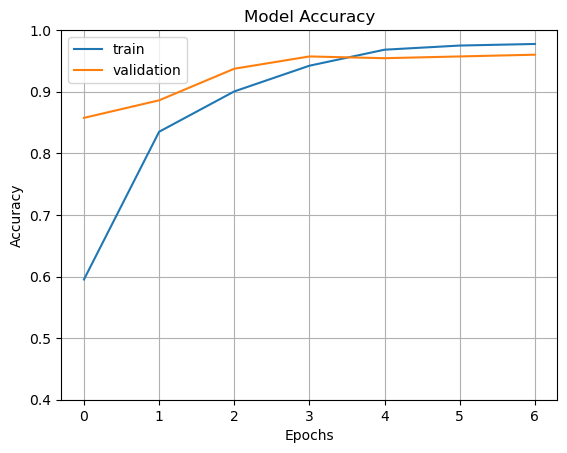

In [29]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

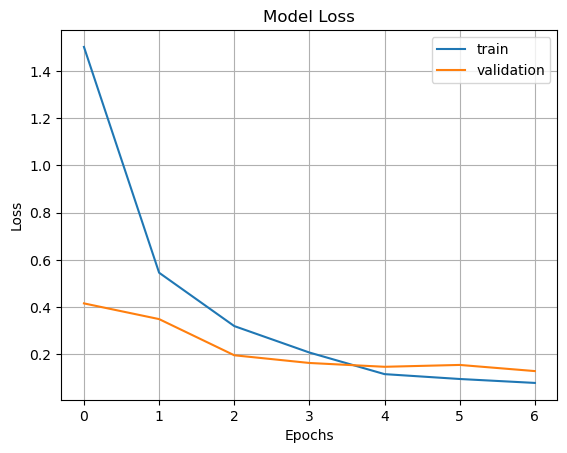

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [31]:
import cv2
import os
result=[0]*36
for image_class in os.listdir(test_data): 
    for image in os.listdir(os.path.join(test_data, image_class)):
        image_path = os.path.join(test_data, image_class, image)
        img = cv2.imread(image_path)
        image_resized= cv2.resize(img, (img_height,img_width))
        image=np.expand_dims(image_resized,axis=0)
        pred=resnet_model.predict(image)
        output_class=class_names[np.argmax(pred)]
        if(output_class==image_class):
            result[np.argmax(pred)]+=1
            










1/1 [==============================] - 0s 25ms/step


In [32]:
print(result)

[9, 7, 7, 8, 10, 10, 9, 10, 5, 7, 10, 10, 10, 9, 10, 10, 10, 10, 9, 9, 10, 1, 3, 10, 10, 10, 10, 5, 8, 8, 10, 10, 5, 6, 10, 10]


In [33]:
# actual_result=[0]*36
# for image_class in os.listdir(test_data): 
#     for image in os.listdir(os.path.join(test_data, image_class)):
#         actual_result[]

In [37]:
import cv2
image=cv2.imread('/kaggle/input/kiwiw12312/thumb_720_450_Kiwi_shutterstock_84220885-1.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
pred=resnet_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

(1, 256, 256, 3)
1/1 [==============================] - 0s 26ms/step
[[8.74034740e-05 1.08370215e-04 2.07220874e-05 2.21547566e-06
  1.22624129e-04 1.16643980e-06 9.02031607e-05 6.74491446e-07
  1.19634764e-08 4.30293767e-06 1.01473005e-02 1.07044354e-04
  1.89829982e-04 1.60239017e-06 1.58968222e-04 6.98785807e-05
  9.72831786e-01 1.11585436e-03 1.74319325e-07 1.37493567e-04
  1.63236470e-03 1.58728255e-06 1.00001358e-07 1.10823501e-04
  4.32974157e-05 1.21214862e-05 9.93533256e-10 3.97662433e-07
  1.02806887e-04 3.35619711e-06 1.27777446e-06 8.46258899e-06
  1.98212801e-05 1.13605131e-06 3.15417565e-04 1.25493230e-02]]
The predicted class is kiwi
